In [1]:
%gui wx
%matplotlib inline

In [2]:
from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from mayavi import mlab
import seaborn as sns
from vtk_rw import read_vtk, write_vtk
import operator

/home/raid3/huntenburg/workspace/try_openblas/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
def make_cmap(c):
    cmap = np.asarray(sns.color_palette('Blues', c-1))
    cmap = np.concatenate((np.array([[0.8,0.8,0.8]]), cmap), axis=0)
    cmap = np.concatenate((cmap, np.ones((c,1))), axis=1)
    cmap_seaborn = [tuple(cmap[i]) for i in range(len(cmap))]

    cmap_255=np.zeros_like(cmap)
    for row in range(cmap.shape[0]):
        cmap_255[row]=[np.floor(i * 255) for i in cmap[row]]
    cmap_255=cmap_255.astype(int)
    
    return cmap_seaborn, cmap_255

### load data

In [4]:
hemi='rh'
embed=10
k=15
smooth='smooth_3'
masktype='02_4'
pal, pal_255 = make_cmap(k+1)

mesh_file = '/scr/ilz3/myelinconnect/all_data_on_simple_surf/surfs/lowres_%s_d.vtk'%hemi
mask_file = '/scr/ilz3/myelinconnect/all_data_on_simple_surf/masks/%s_fullmask_%s.npy'%(hemi, masktype)
embed_file='/scr/ilz3/myelinconnect/all_data_on_simple_surf/clust/%s/mask_%s/%s_embed_%s.npy'%(smooth, masktype, hemi, str(embed))
kmeans_file='/scr/ilz3/myelinconnect/all_data_on_simple_surf/clust/%s/mask_%s/%s_embed_%s_kmeans_%s.npy'%(smooth, masktype, hemi, str(embed), str(k))
t1_file = '/scr/ilz3/myelinconnect/all_data_on_simple_surf/t1/avg_%s_profiles.npy'%(hemi)

#var_file=data_dir+'/results_k%s_s%s_other/%s_%s_cluster_var.csv'%(str(n_components_kmeans),smooth, sub, hemi)
#t_file=data_dir+'/results_k%s_s%s_other/%s_%s_cluster_avg_t.csv'%(str(n_components_kmeans),smooth, sub, hemi)
#p_file=data_dir+'/results_k%s_s%s_other/%s_%s_cluster_avg_p.csv'%(str(n_components_kmeans),smooth, sub, hemi)
#fig_file=data_dir+'/results_k%s_s%s_other/%s_%s_cluster_violins.svg'%(str(n_components_kmeans),smooth, sub, hemi)

In [5]:
v,f,d = read_vtk(mesh_file)
x=v[:,0]
y=v[:,1]
z=v[:,2]
triangles=f


mask = np.load(mask_file)
embed=np.load(embed_file)
clust=np.load(kmeans_file)
t1=np.load(t1_file)

In [6]:
scatter_t1 = np.zeros((t1.shape[0],))
for v in range(t1.shape[0]):
    scatter_t1[v] = np.mean(t1[v][3:8])
scatter_embed=embed[:,0]
t1_idx=np.where(scatter_t1<=1500)
scatter_t1 = np.delete(scatter_t1, t1_idx)
scatter_embed = np.delete(scatter_embed, t1_idx)

embed_idx=np.where(scatter_embed==0)
scatter_embed = np.delete(scatter_embed, embed_idx)
scatter_t1 = np.delete(scatter_t1, embed_idx)

In [7]:
sns.set_context('poster')

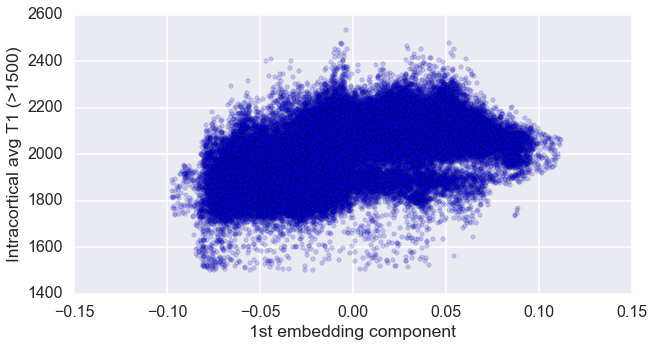

In [8]:
fig = plt.figure(figsize=(10,5))
plt.scatter(scatter_embed, scatter_t1, alpha=0.2)
plt.xlabel('1st embedding component')
plt.ylabel('Intracortical avg T1 (>1500)')

/home/raid3/huntenburg/workspace/try_openblas/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


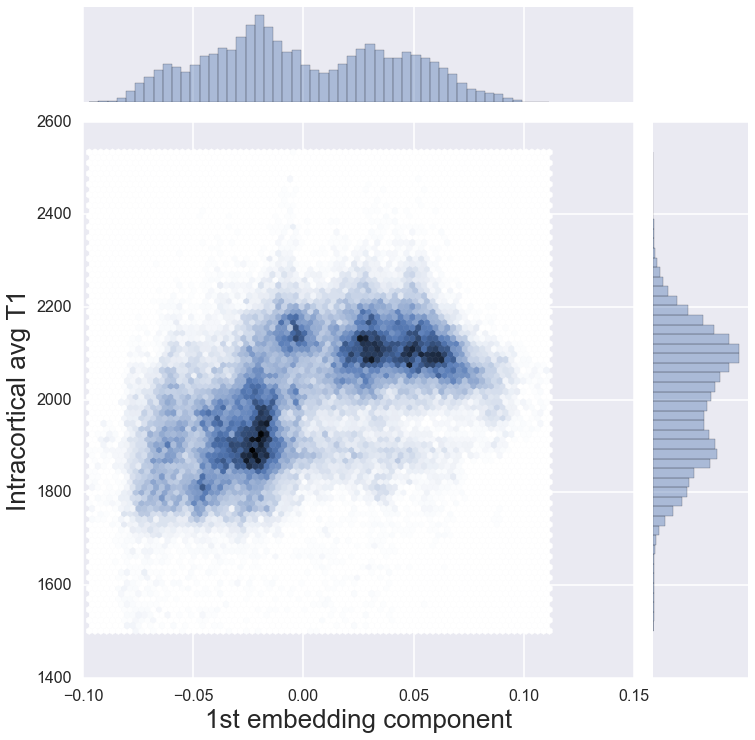

In [9]:
g = sns.jointplot(scatter_embed, scatter_t1, kind="hex", size=10, stat_func=None)
g.set_axis_labels('1st embedding component', 'Intracortical avg T1', fontsize=26)

In [15]:
root_t1 = np.zeros((t1.shape[0],))
for v in range(t1.shape[0]):
    root_t1[v] = np.mean(t1[v][3:8])
root_embed=embed[:,0]

root_mask = np.ones((t1.shape[0],))
root_mask[np.where(root_t1<2100)]=0
root_mask[np.where(root_t1>2300)]=0
root_mask[np.where(root_embed>0.01)]=0
root_mask[np.where(root_embed<-0.02)]=0
root_mask[np.where(root_embed==0)]=0


idx_1=np.where(root_t1<2100)
root_t1=np.delete(root_t1, idx_1)
root_embed=np.delete(root_embed, idx_1)
idx_2=np.where(root_t1>2300)
root_t1=np.delete(root_t1, idx_2)
root_embed=np.delete(root_embed, idx_2)
idx_3=np.where(root_embed>0.01)
root_t1=np.delete(root_t1, idx_3)
root_embed=np.delete(root_embed, idx_3)
idx_4=np.where(root_embed<-0.02)
root_t1=np.delete(root_t1, idx_4)
root_embed=np.delete(root_embed, idx_4)
idx_5=np.where(root_embed==0)
root_t1=np.delete(root_t1, idx_5)
root_embed=np.delete(root_embed, idx_5)


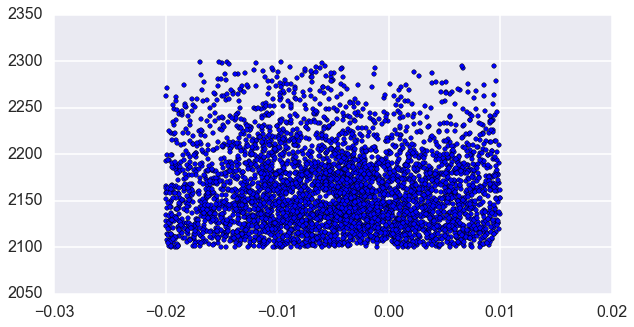

In [16]:
fig = plt.figure(figsize=(10,5))
plt.scatter(root_embed, root_t1)

In [17]:
pal, pal_255 = make_cmap(3)

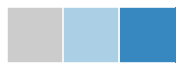

In [18]:
sns.palplot(pal)

In [19]:
mlab.figure(bgcolor=(1, 1, 1))
img = mlab.triangular_mesh(x,y,z,triangles,scalars=root_mask, colormap='Greys')
lut = img.module_manager.scalar_lut_manager.lut.table.to_array()
img.module_manager.scalar_lut_manager.lut.table = pal_255
mlab.draw()
mlab.show()